In [149]:
#import libs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [2]:
catalog.list()

['election_databse',
 'pp_election',
 'encode_territoryname_dataset',
 'encode_party_dataset',
 'label_encoder',
 'label_encoder_party',
 'parameters']

In [3]:
df = catalog.load('election_databse')
pd.set_option('display.max_columns', None)
df.head()

2022-06-23 22:31:51,451 - kedro.io.data_catalog - INFO - Loading data from `election_databse` (CSVDataSet)...


,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [4]:
df.dtypes
#territoryName ----- object
#Party ----- object

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

2022-06-23 22:31:58,322 - kedro.io.data_catalog - INFO - Loading data from `election_databse` (CSVDataSet)...


<AxesSubplot:xlabel='territoryName', ylabel='count'>

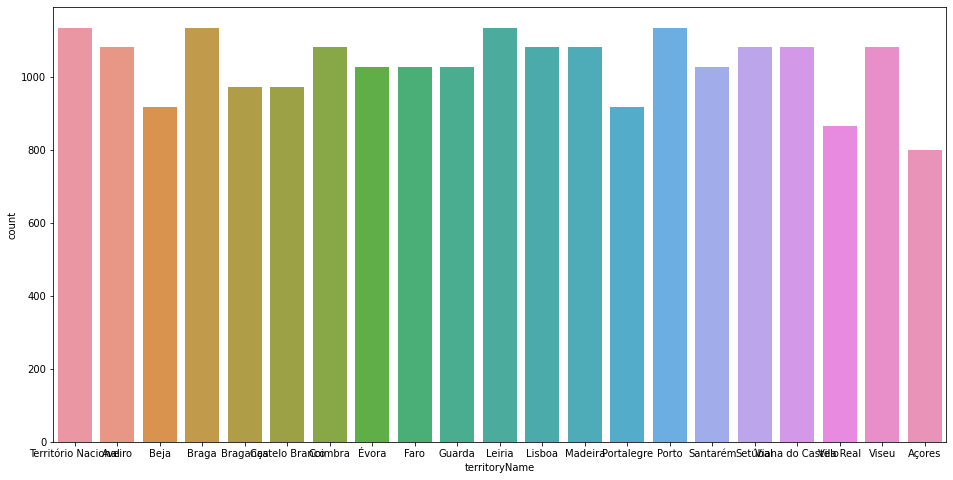

In [5]:
#Avaliando o Nome de territorio
f, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='territoryName', data=catalog.load('election_databse'))

2022-06-23 22:32:00,035 - kedro.io.data_catalog - INFO - Loading data from `election_databse` (CSVDataSet)...


<AxesSubplot:xlabel='Party', ylabel='count'>

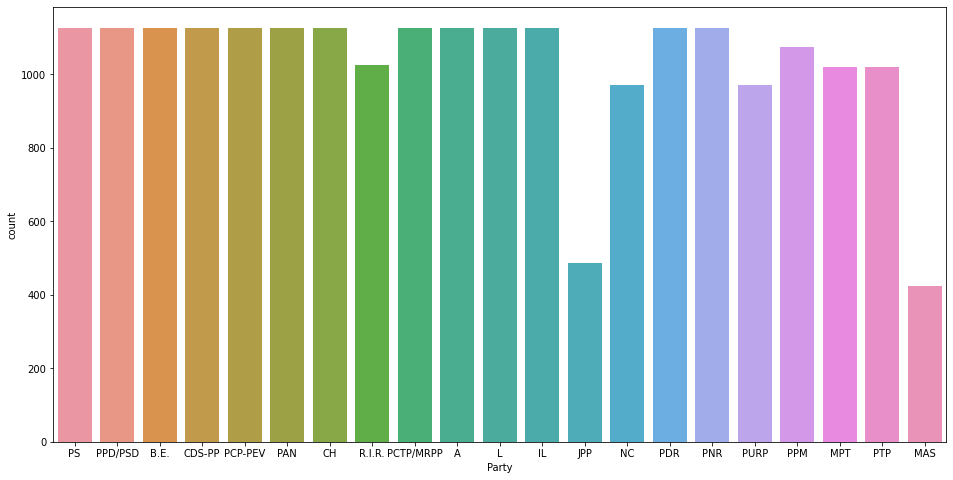

In [6]:
#Avaliando o partido
f, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='Party', data=catalog.load('election_databse'))

In [21]:
dados_election = catalog.load('election_databse')

2022-06-24 00:00:27,567 - kedro.io.data_catalog - INFO - Loading data from `election_databse` (CSVDataSet)...


In [25]:
corr = dados_election[['totalMandates', 'availableMandates']].corr()
corr

,totalMandates,availableMandates
totalMandates,1.000000,0.217404
availableMandates,0.217404,1.000000


<AxesSubplot:>

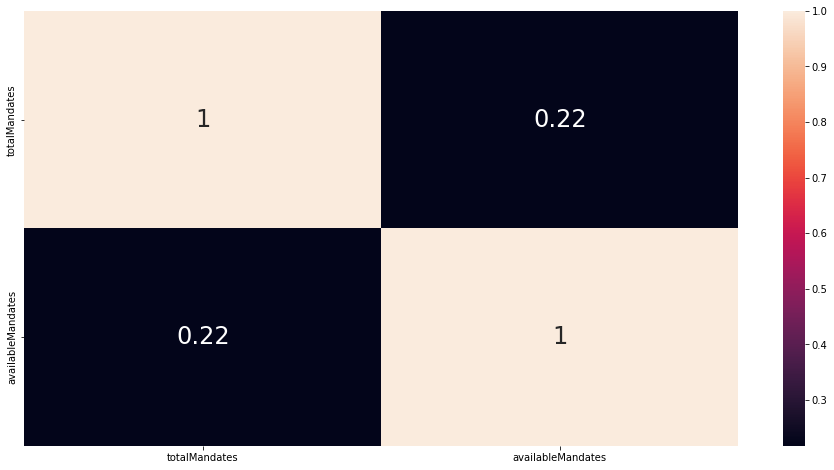

In [36]:
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(data=corr, 
           annot=True,
           annot_kws={'size':24})

In [49]:
corr_all = catalog.load('election_databse').corr()
corr_all
corr_all.style.background_gradient(cmap='Reds')

2022-06-23 22:44:52,579 - kedro.io.data_catalog - INFO - Loading data from `election_databse` (CSVDataSet)...


,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
TimeElapsed,1.000000,0.260377,-0.261627,-0.001944,0.100432,0.192350,0.034343,0.185784,-0.225021,0.029698,0.195487,0.198243,0.195734,0.093739,0.189902,-0.106054,0.054761,0.193160,0.196667,0.090190,0.000767,0.000526,0.082417,-0.001100,-0.001007
totalMandates,0.260377,1.000000,0.217404,0.765877,0.873415,0.969988,-0.003149,0.967294,-0.165132,0.171317,0.974407,0.976336,0.973357,0.034774,0.969992,-0.132143,0.151927,0.972976,0.975404,0.336989,-0.010171,-0.010474,0.395617,0.288420,0.264117
availableMandates,-0.261627,0.217404,1.000000,0.745472,0.562719,0.390638,-0.002806,0.407366,0.029915,0.112293,0.385828,0.379093,0.383877,-0.008966,0.399074,-0.044174,0.080524,0.391272,0.383089,0.072320,-0.011083,-0.011052,0.152348,0.291310,0.266764
numParishes,-0.001944,0.765877,0.745472,1.000000,0.954092,0.861279,0.032013,0.870240,0.013209,0.073855,0.856855,0.850881,0.856779,0.036461,0.864837,-0.058017,0.026407,0.860782,0.853779,0.257365,-0.010770,-0.010624,0.343593,0.359283,0.329009
numParishesApproved,0.100432,0.873415,0.562719,0.954092,1.000000,0.951265,0.035153,0.956142,-0.037416,0.081157,0.946191,0.940941,0.947190,0.050378,0.951899,-0.073301,0.042180,0.949110,0.943147,0.293795,-0.009840,-0.009767,0.380311,0.340901,0.312177
blankVotes,0.192350,0.969988,0.390638,0.861279,0.951265,1.000000,0.038503,0.998781,-0.150894,0.183970,0.998297,0.997951,0.999657,0.072183,0.997490,-0.150275,0.161642,0.998487,0.998178,0.326630,-0.011883,-0.012002,0.404003,0.322780,0.295583
blankVotesPercentage,0.034343,-0.003149,-0.002806,0.032013,0.035153,0.038503,1.000000,0.006615,0.094047,-0.190778,0.001598,-0.002062,0.030061,0.959142,-0.006067,-0.307544,-0.105314,0.002821,-0.000069,-0.000926,-0.006258,-0.002076,-0.001486,-0.001305,-0.001195
nullVotes,0.185784,0.967294,0.407366,0.870240,0.956142,0.998781,0.006615,1.000000,-0.136296,0.181411,0.998988,0.998405,0.998883,0.041317,0.999298,-0.125639,0.154965,0.999296,0.998706,0.325711,-0.011602,-0.011820,0.404195,0.326144,0.298663
nullVotesPercentage,-0.225021,-0.165132,0.029915,0.013209,-0.037416,-0.150894,0.094047,-0.136296,1.000000,-0.108855,-0.157263,-0.161816,-0.152234,0.100924,-0.141809,0.497749,-0.233688,-0.153891,-0.159566,-0.056254,0.003301,0.005441,-0.066526,-0.032388,-0.029659
votersPercentage,0.029698,0.171317,0.112293,0.073855,0.081157,0.183970,-0.190778,0.181411,-0.108855,1.000000,0.173603,0.190476,0.181595,-0.144312,0.170285,-0.278275,0.909825,0.172542,0.186834,0.056553,-0.019836,-0.020966,0.076377,0.066665,0.061048


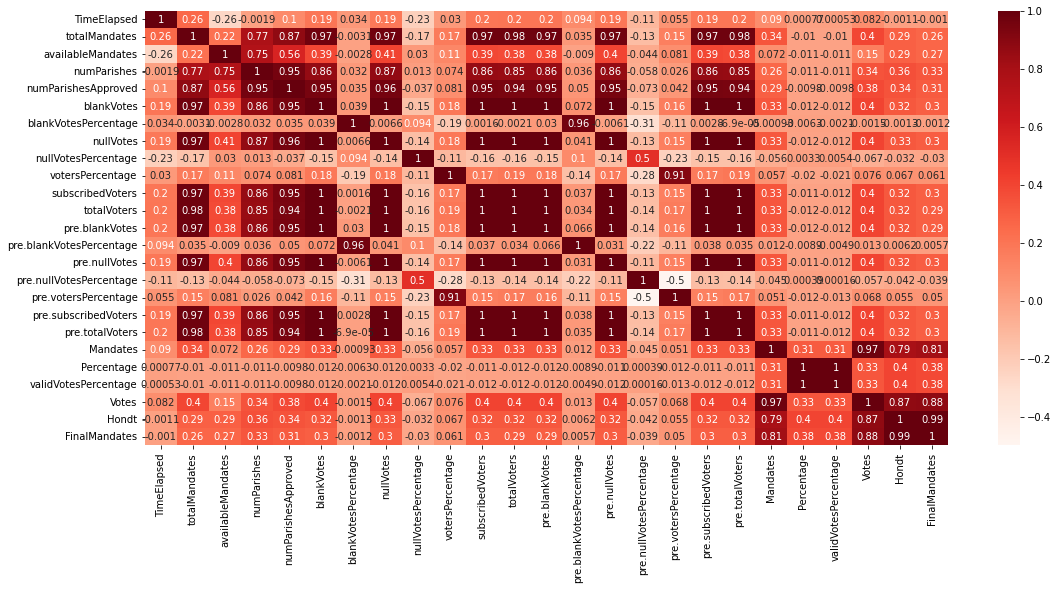

In [58]:
f, ax = plt.subplots(figsize=(18,8))
sns.heatmap(data=corr_all, 
           annot=True,
           annot_kws=None,
           cmap="Reds")
plt.show()

In [140]:
#Limpando o dataframe, considerando a correlacao >0,9
dados_election = catalog.load('election_databse')
dados_election_corr = df.drop(columns=['TimeElapsed', 'availableMandates', 'blankVotesPercentage', 'nullVotesPercentage', 'votersPercentage', 'pre.blankVotesPercentage', 'pre.nullVotesPercentage', 'pre.votersPercentage', 'Percentage', 'validVotesPercentage'])
dados_election_corr.shape
dados_election_corr.dtypes


2022-06-24 00:25:36,561 - kedro.io.data_catalog - INFO - Loading data from `election_databse` (CSVDataSet)...


time                    object
territoryName           object
totalMandates            int64
numParishes              int64
numParishesApproved      int64
blankVotes               int64
nullVotes                int64
subscribedVoters         int64
totalVoters              int64
pre.blankVotes           int64
pre.nullVotes            int64
pre.subscribedVoters     int64
pre.totalVoters          int64
Party                   object
Mandates                 int64
Votes                    int64
Hondt                    int64
FinalMandates            int64
dtype: object

In [3]:
def func_drop_columns(df):
""" This function clears the dataframe. Study performed from the heatmap, considering correlation > 0.9 """    
   
    #Remove columns with correlation less than 0.9
    df = df.drop(columns=['TimeElapsed', 'availableMandates', 'blankVotesPercentage', 'nullVotesPercentage', 'votersPercentage', 'pre.blankVotesPercentage', 'pre.nullVotesPercentage', 'pre.votersPercentage', 'Percentage', 'validVotesPercentage'])
    
    return df


In [4]:
#testando a funcao

df_cleaned = func_drop_columns(catalog.load('election_databse'))

2022-06-27 20:53:00,029 - kedro.io.data_catalog - INFO - Loading data from `election_databse` (CSVDataSet)...


2022-06-24 00:34:50,987 - kedro.io.data_catalog - INFO - Loading data from `encode_party_dataset` (CSVDataSet)...


<AxesSubplot:>

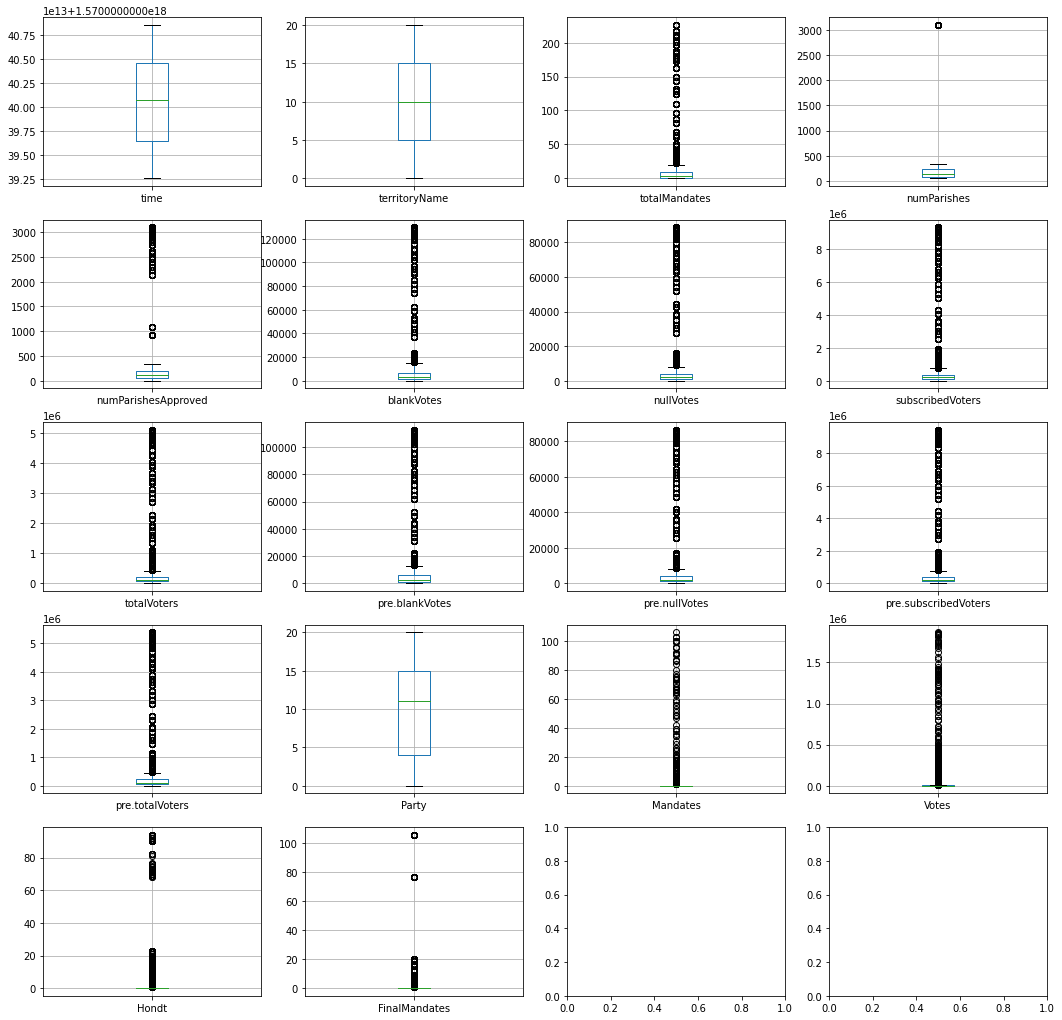

In [147]:
#Verificando outliers:
dados_election_encoded = catalog.load('encode_party_dataset')
dados_election_encoded


#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(5, 4, figsize=(18,18))

dados_election_encoded.boxplot(column=['time'], ax=axes[0,0])
dados_election_encoded.boxplot(column=['territoryName'], ax=axes[0,1])
dados_election_encoded.boxplot(column=['totalMandates'], ax=axes[0,2])
dados_election_encoded.boxplot(column=['numParishes'], ax=axes[0,3])
dados_election_encoded.boxplot(column=['numParishesApproved'], ax=axes[1,0])
dados_election_encoded.boxplot(column=['blankVotes'], ax=axes[1,1])
dados_election_encoded.boxplot(column=['nullVotes'], ax=axes[1,2])
dados_election_encoded.boxplot(column=['subscribedVoters'], ax=axes[1,3])
dados_election_encoded.boxplot(column=['totalVoters'], ax=axes[2,0])
dados_election_encoded.boxplot(column=['pre.blankVotes'], ax=axes[2,1])
dados_election_encoded.boxplot(column=['pre.nullVotes'], ax=axes[2,2])
dados_election_encoded.boxplot(column=['pre.subscribedVoters'], ax=axes[2,3])
dados_election_encoded.boxplot(column=['pre.totalVoters'], ax=axes[3,0])
dados_election_encoded.boxplot(column=['Party'], ax=axes[3,1])
dados_election_encoded.boxplot(column=['Mandates'], ax=axes[3,2])
dados_election_encoded.boxplot(column=['Votes'], ax=axes[3,3])
dados_election_encoded.boxplot(column=['Hondt'], ax=axes[4,0])
dados_election_encoded.boxplot(column=['FinalMandates'], ax=axes[4,1])

In [154]:
#Removal of Outliers
#REF: https://www.askpython.com/python/examples/detection-removal-outliers-in-python

for x in dados_election_encoded:
    q75,q25 = np.percentile(dados_election_encoded.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    dados_election_encoded.loc[dados_election_encoded[x] < min,x] = np.nan
    dados_election_encoded.loc[dados_election_encoded[x] > max,x] = np.nan

In [155]:
dados_election_encoded.isnull().sum()

TimeElapsed                    0
time                           0
territoryName                  0
totalMandates               1826
availableMandates           2129
numParishes                 1134
numParishesApproved         1134
blankVotes                  2013
blankVotesPercentage        1879
nullVotes                   2200
nullVotesPercentage          168
votersPercentage             959
subscribedVoters            2744
totalVoters                 2849
pre.blankVotes              2054
pre.blankVotesPercentage     221
pre.nullVotes               2158
pre.nullVotesPercentage     1080
pre.votersPercentage           0
pre.subscribedVoters        2220
pre.totalVoters             2723
Party                          0
Mandates                    2305
Percentage                  3434
validVotesPercentage        3434
Votes                       3564
Hondt                       3889
FinalMandates               3820
dtype: int64